In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [45]:
df = pd.read_csv('main_dataset/train.csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## How many male and female and children (age < 20) survived and died?

In [19]:
print("----------------------Survived---------------------------")
print("Male =>",df[(df["Survived"] == 1) & (df["Age"] < 20)].groupby('Sex').get_group("male")["PassengerId"].count())
print("Female =>",df[(df["Survived"] == 1) & (df["Age"] < 20)].groupby('Sex').get_group("female")["PassengerId"].count())
print("----------------------Died-------------------------------")
print("Male =>",df[(df["Survived"] == 0) & (df["Age"] < 20)].groupby('Sex').get_group("male")["PassengerId"].count())
print("Female =>",df[(df["Survived"] == 0) & (df["Age"] < 20)].groupby('Sex').get_group("female")["PassengerId"].count())

----------------------Survived---------------------------
Male => 26
Female => 53
----------------------Died-------------------------------
Male => 63
Female => 22


## How many higher class >50 fare, middle class 20 - <50 and lower class <20 survived ?

In [23]:
for key,value in df[df["Survived"] == 1].groupby('Pclass')["Pclass"].count().items():
    print(f'-------------{key}---------------')
    print("Survived=>",value)

-------------1---------------
Survived=> 136
-------------2---------------
Survived=> 87
-------------3---------------
Survived=> 119


## How many are there in corresponding cabin A..., B... C... and so on and also no cabins

In [25]:
for key,value in df[df["Survived"] == 1].groupby('Cabin')["Cabin"].count().items():
    print(f'-------------{key}---------------')
    print("Survived=>",value)

-------------A16---------------
Survived=> 1
-------------A20---------------
Survived=> 1
-------------A23---------------
Survived=> 1
-------------A26---------------
Survived=> 1
-------------A31---------------
Survived=> 1
-------------A34---------------
Survived=> 1
-------------A6---------------
Survived=> 1
-------------B101---------------
Survived=> 1
-------------B18---------------
Survived=> 2
-------------B20---------------
Survived=> 2
-------------B22---------------
Survived=> 1
-------------B28---------------
Survived=> 2
-------------B3---------------
Survived=> 1
-------------B35---------------
Survived=> 2
-------------B39---------------
Survived=> 1
-------------B4---------------
Survived=> 1
-------------B41---------------
Survived=> 1
-------------B42---------------
Survived=> 1
-------------B49---------------
Survived=> 2
-------------B5---------------
Survived=> 2
-------------B50---------------
Survived=> 1
-------------B51 B53 B55---------------
Survived=> 1
-----

## How much % of male and femail survived in the titanic data

In [39]:
totalcount  = df["PassengerId"].count()
print(totalcount)
for key,item in df.groupby('Sex')["PassengerId"].count().items():
    print(f"----------------TOTAL =>{key}-----------------")
    print(f"Count => {item}")
    print(f"Count % with total population  => {(item/totalcount)*100}")
for key,item in df[(df["Survived"] == 1)].groupby('Sex')["PassengerId"].count().items():
    print(f"----------------{key}-----------------")
    print(f"Survived=> {item}")
    print(f"Survived % with total population  => {(item/totalcount)*100}")
for key,item in df[(df["Survived"] == 0)].groupby('Sex')["PassengerId"].count().items():
    print(f"----------------{key}-----------------")
    print(f"Died=> {item}")
    print(f"Died % with total population  => {(item/totalcount)*100}")    

891
----------------TOTAL =>female-----------------
Count => 314
Count % with total population  => 35.24130190796858
----------------TOTAL =>male-----------------
Count => 577
Count % with total population  => 64.75869809203144
----------------female-----------------
Survived=> 233
Survived % with total population  => 26.15039281705948
----------------male-----------------
Survived=> 109
Survived % with total population  => 12.2334455667789
----------------female-----------------
Died=> 81
Died % with total population  => 9.090909090909092
----------------male-----------------
Died=> 468
Died % with total population  => 52.52525252525253


## In which age group as mostely been there in the Titanic Ship

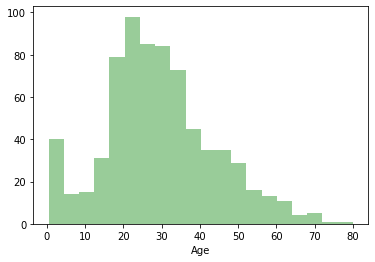

In [50]:
grph = sns.distplot( df["Age"], color = 'Green', kde = False)
## as per the graph it between 20-30 age group

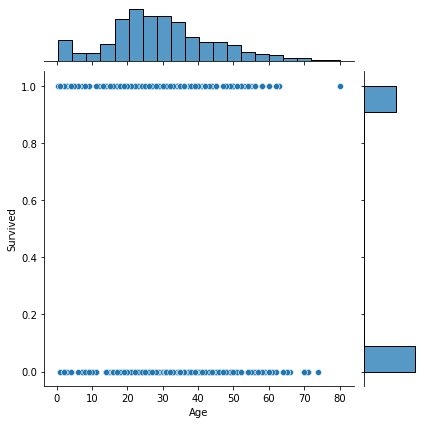

In [51]:
# plotting bivariate data
sns.jointplot(x = 'Age', y = 'Survived', data = df)